In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [71]:
data = pd.read_csv(r'C:\Users\dimri\OneDrive\Desktop\vs code java\myfirstvscode\regression task\robosheet1.csv')

In [72]:
data

,AGE,FEMALE,LOS,RACE,TOTCHG,APRDRG
0,17,1,2,1.0,2660,560
1,17,0,2,1.0,1689,753
2,17,1,7,1.0,20060,930
3,17,1,1,1.0,736,758
4,17,1,1,1.0,1194,754
...,...,...,...,...,...,...
495,0,1,6,1.0,5881,636
496,0,1,2,1.0,1171,640
497,0,1,2,1.0,1171,640
498,0,1,2,1.0,1086,640


In [73]:
#header = data.iloc[0]


In [74]:
#data = data[1:]



In [75]:
# Reset the index after removing the header
#data.reset_index(drop=True, inplace=True)

In [76]:
data.isnull().values.any()

#this shouldve returned true if there were any nan values in our dataset whhich it does so there does exist 

True

In [77]:
# import seaborn as sns
# sns.heatmap(data.isnull(), cbar=False)
# plt.show()

#

In [78]:
# Check for missing values in the entire dataset
missing_values = data.isnull().sum()

# Display columns with missing values (if any) and their respective counts
print(missing_values[missing_values > 0])

RACE    1
dtype: int64


In [79]:
data.dropna(inplace=True)

In [80]:
# Check for missing values in the entire dataset
missing_values = data.isnull().sum()

# Display columns with missing values (if any) and their respective counts
print(missing_values[missing_values > 0])

Series([], dtype: int64)


In [81]:
data

,AGE,FEMALE,LOS,RACE,TOTCHG,APRDRG
0,17,1,2,1.0,2660,560
1,17,0,2,1.0,1689,753
2,17,1,7,1.0,20060,930
3,17,1,1,1.0,736,758
4,17,1,1,1.0,1194,754
...,...,...,...,...,...,...
495,0,1,6,1.0,5881,636
496,0,1,2,1.0,1171,640
497,0,1,2,1.0,1171,640
498,0,1,2,1.0,1086,640


In [82]:
# Separate features (X) and target variable (y)
X = data[['AGE', 'LOS', 'FEMALE', 'APRDRG', 'RACE']].values  # Select relevant features and convert to NumPy array
y = data['TOTCHG'].values  # Target variable

In [83]:
data.isnull().sum()

#all values coming out as 0 implies no missing or nan values

AGE       0
FEMALE    0
LOS       0
RACE      0
TOTCHG    0
APRDRG    0
dtype: int64

In [84]:
nan_values_X = np.isnan(X)
nan_values_y = np.isnan(y)
print("NaN values in X:", np.any(nan_values_X))
print("NaN values in y:", np.any(nan_values_y))

# Check the data types of X and y
print("Data types of X:", X.dtype)
print("Data types of y:", y.dtype)

NaN values in X: False
NaN values in y: False
Data types of X: float64
Data types of y: int64


In [87]:
class linear_regression: 
    def __init__(self, lr=0.0001, k=10000):
        self.lr = lr   # Learning rate
        self.k = k     # Number of iterations
        self.weights = None  # Weights
        self.b = None        # Bias

    def training_fn(self, x, y):
        sample_no, feature_no = x.shape 
        
        self.weights = np.zeros(feature_no)
        self.b = 0 

        for i in range(self.k):
            y_cap = np.dot(x, self.weights) + self.b
            
            dw = (1/sample_no) * np.dot(x.T, (y_cap - y))
            db = (1/sample_no) * np.sum(y_cap - y)

            # Update parameters
            self.weights -= self.lr * dw
            self.b -= self.lr * db

    def prediction(self, x):
        y_cap = np.dot(x, self.weights.reshape(-1,1)) + self.b
        return y_cap

#to instantiate and trina model
model = linear_regression(lr=0.0001, k=10000)
model.training_fn(X, y)

# Get the weights and bias term
coefficients = model.weights
bias = model.b


print("Coefficients", coefficients)
print("Bias", bias)


C:\Users\dimri\AppData\Local\Temp\ipykernel_11008\2556035574.py:21: RuntimeWarning: invalid value encountered in subtract
  self.weights -= self.lr * dw


Coefficients [nan nan nan nan nan]
Bias nan


In [ ]:
#for the graph rep

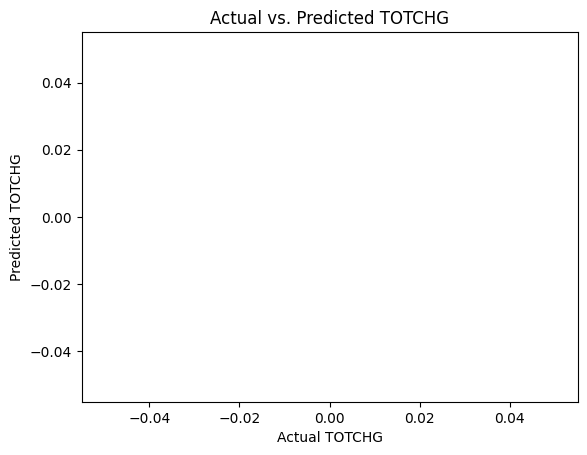

In [86]:
plt.scatter(y, model.prediction(X).flatten())
plt.xlabel('Actual TOTCHG')
plt.ylabel('Predicted TOTCHG')
plt.title('Actual vs. Predicted TOTCHG')
plt.show()